# **QFT Frequency to state**

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import math
%matplotlib inline

In [3]:
# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

In [4]:
def main():
    ## prepare the signal
    qc.x(signal[0])
    qc.x(signal[1])

    qc.barrier()
    invQFT(signal)

In [5]:
def invQFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    # Start the inverse QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[j], qreg[k])
        qc.h(qreg[j])

main()

/tmp/ipykernel_153/124917811.py:13: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(-math.pi/float(2**(j-k)), qreg[j], qreg[k])


In [6]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

|0> (0.25-0j) probability = 6.25%
|1> (0.096-0.231j) probability = 6.2577%
|2> (-0.177-0.177j) probability = 6.2658%
|3> (-0.231+0.096j) probability = 6.2577%
|4> 0.25j probability = 6.25%
|5> (0.231+0.096j) probability = 6.2577%
|6> (0.177-0.177j) probability = 6.2658%
|7> (-0.096-0.231j) probability = 6.2577%
|8> (-0.25+0j) probability = 6.25%
|9> (-0.096+0.231j) probability = 6.2577%
|10> (0.177+0.177j) probability = 6.2658%
|11> (0.231-0.096j) probability = 6.2577%
|12> (-0-0.25j) probability = 6.25%
|13> (-0.231-0.096j) probability = 6.2577%
|14> (-0.177+0.177j) probability = 6.2658%
|15> (0.096+0.231j) probability = 6.2577%


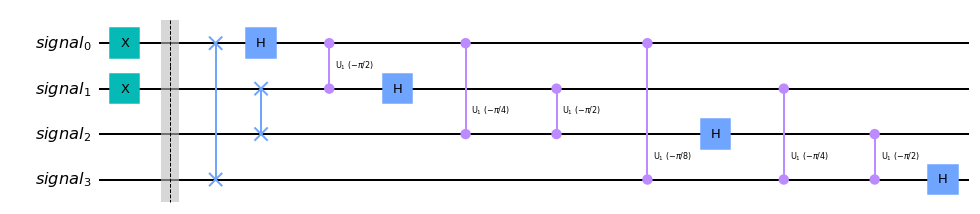

In [7]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit